# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.8.0


## Step 1: Create a corpus

In [2]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [3]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split("\n")
print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


## Step 2: Train the tokenizer and create word encoding dictionary

In [4]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

## Step 3: Create N-gram sequence

In [5]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


In [6]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


## Step 4: Extract features and labels

In [7]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [8]:
print(tokenizer.word_index['mud'])
print(X[0])
print(y[0])

116
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Define the LSTM model

In [9]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
5/5 [==============================] - 2s 13ms/step - loss: 4.7586 - accuracy: 0.0267
Epoch 2/500
5/5 [==============================] - 0s 17ms/step - loss: 4.7419 - accuracy: 0.0867
Epoch 3/500
5/5 [==============================] - 0s 14ms/step - loss: 4.7247 - accuracy: 0.0867
Epoch 4/500
5/5 [==============================] - 0s 17ms/step - loss: 4.6981 - accuracy: 0.0867
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 4.6555 - accuracy: 0.0867
Epoch 6/500
5/5 [==============================] - 0s 15ms/step - loss: 4.6051 - accuracy: 0.0867
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 4.5561 - accuracy: 0.0867
Epoch 8/500
5/5 [==============================] - 0s 16ms/step - loss: 4.5175 - accuracy: 0.0867
Epoch 9/500
5/5 [==============================] - 0s 15ms/step - loss: 4.4907 - accuracy: 0.0867
Epoch 10/500
5/5 [==============================] - 0s 15ms/step - loss: 4.4600 - accuracy: 0.0867
Epoch 11/500
5/5 [=

5/5 [==============================] - 0s 13ms/step - loss: 1.0604 - accuracy: 0.9600
Epoch 166/500
5/5 [==============================] - 0s 12ms/step - loss: 1.0466 - accuracy: 0.9600
Epoch 167/500
5/5 [==============================] - 0s 12ms/step - loss: 1.0385 - accuracy: 0.9600
Epoch 168/500
5/5 [==============================] - 0s 14ms/step - loss: 1.0300 - accuracy: 0.9667
Epoch 169/500
5/5 [==============================] - 0s 14ms/step - loss: 1.0202 - accuracy: 0.9600
Epoch 170/500
5/5 [==============================] - 0s 14ms/step - loss: 1.0101 - accuracy: 0.9600
Epoch 171/500
5/5 [==============================] - 0s 13ms/step - loss: 1.0063 - accuracy: 0.9600
Epoch 172/500
5/5 [==============================] - 0s 13ms/step - loss: 1.0047 - accuracy: 0.9600
Epoch 173/500
5/5 [==============================] - 0s 12ms/step - loss: 1.0163 - accuracy: 0.9467
Epoch 174/500
5/5 [==============================] - 0s 13ms/step - loss: 1.0028 - accuracy: 0.9600
Epoch 175/500


5/5 [==============================] - 0s 12ms/step - loss: 0.5092 - accuracy: 1.0000
Epoch 248/500
5/5 [==============================] - 0s 15ms/step - loss: 0.5004 - accuracy: 1.0000
Epoch 249/500
5/5 [==============================] - 0s 14ms/step - loss: 0.4954 - accuracy: 1.0000
Epoch 250/500
5/5 [==============================] - 0s 14ms/step - loss: 0.4867 - accuracy: 1.0000
Epoch 251/500
5/5 [==============================] - 0s 14ms/step - loss: 0.4824 - accuracy: 1.0000
Epoch 252/500
5/5 [==============================] - 0s 12ms/step - loss: 0.4758 - accuracy: 1.0000
Epoch 253/500
5/5 [==============================] - 0s 13ms/step - loss: 0.4716 - accuracy: 1.0000
Epoch 254/500
5/5 [==============================] - 0s 12ms/step - loss: 0.4679 - accuracy: 1.0000
Epoch 255/500
5/5 [==============================] - 0s 12ms/step - loss: 0.4616 - accuracy: 1.0000
Epoch 256/500
5/5 [==============================] - 0s 13ms/step - loss: 0.4568 - accuracy: 1.0000
Epoch 257/500


5/5 [==============================] - 0s 16ms/step - loss: 0.2424 - accuracy: 1.0000
Epoch 330/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2419 - accuracy: 1.0000
Epoch 331/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2372 - accuracy: 1.0000
Epoch 332/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2319 - accuracy: 1.0000
Epoch 333/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2332 - accuracy: 1.0000
Epoch 334/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2312 - accuracy: 1.0000
Epoch 335/500
5/5 [==============================] - 0s 20ms/step - loss: 0.2285 - accuracy: 1.0000
Epoch 336/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2307 - accuracy: 1.0000
Epoch 337/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2241 - accuracy: 1.0000
Epoch 338/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2204 - accuracy: 1.0000
Epoch 339/500


5/5 [==============================] - 0s 16ms/step - loss: 0.1217 - accuracy: 1.0000
Epoch 412/500
5/5 [==============================] - 0s 21ms/step - loss: 0.1212 - accuracy: 1.0000
Epoch 413/500
5/5 [==============================] - 0s 16ms/step - loss: 0.1198 - accuracy: 1.0000
Epoch 414/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1189 - accuracy: 1.0000
Epoch 415/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1179 - accuracy: 1.0000
Epoch 416/500
5/5 [==============================] - 0s 16ms/step - loss: 0.1171 - accuracy: 1.0000
Epoch 417/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1163 - accuracy: 1.0000
Epoch 418/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1152 - accuracy: 1.0000
Epoch 419/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1147 - accuracy: 1.0000
Epoch 420/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1143 - accuracy: 1.0000
Epoch 421/500


5/5 [==============================] - 0s 16ms/step - loss: 0.0715 - accuracy: 1.0000
Epoch 494/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0710 - accuracy: 1.0000
Epoch 495/500
5/5 [==============================] - 0s 21ms/step - loss: 0.0705 - accuracy: 1.0000
Epoch 496/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0702 - accuracy: 1.0000
Epoch 497/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0698 - accuracy: 1.0000
Epoch 498/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0693 - accuracy: 1.0000
Epoch 499/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0688 - accuracy: 1.0000
Epoch 500/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0685 - accuracy: 1.0000


## Visualize metrics

In [10]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

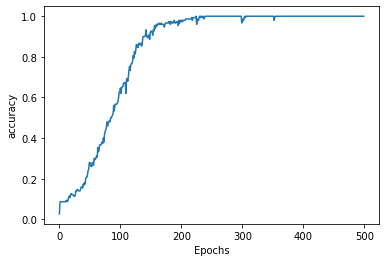

In [11]:
plot_metric(history, 'accuracy')

## Generate new text

In [23]:
seed_text = "It was a cold night."

##add number of words you want to predict
next_words = 100
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 
    ##predict the class using the trained model
    #predicted = model.predict_classes(token_list, verbose=0)
    predicted= np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        ##reference the predicted class with the vocabulary
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

It was a cold night. damp for regular training sessions however was not dampened which was why harry was to be found late one stormy saturday afternoon a few days before halloween returning to gryffindor the skin and splattered splattered with mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud mud the and looking pale mud mud mud mud percy percy percy percy returning to mud mud mud mud mud some mud mud mud mud mud
